In [ ]:
!wget https://www.dropbox.com/scl/fo/884iu8bni6c43wth64zry/h?rlkey=yirbt2867jvfgb71yyqqik9wf&dl=0 #commnade line-tool 'wget' to download files from internet to current directory

--2024-03-04 16:06:53--  https://www.dropbox.com/scl/fo/884iu8bni6c43wth64zry/h?rlkey=yirbt2867jvfgb71yyqqik9wf
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce03cecbe5f288fa769ace221f7.dl.dropboxusercontent.com/zip_download_get/Bx1f0Mlcqt6Cd-x9JGJwdlcxRrMAhSAQzD6WLOM6GJkaLdeGeAEFB8hS959idJD0aVQbzhT4ZkkPn2Avc9-H2XaHqvRW1_IOXS0EN39RSGPOUQ# [following]
--2024-03-04 16:07:00--  https://uce03cecbe5f288fa769ace221f7.dl.dropboxusercontent.com/zip_download_get/Bx1f0Mlcqt6Cd-x9JGJwdlcxRrMAhSAQzD6WLOM6GJkaLdeGeAEFB8hS959idJD0aVQbzhT4ZkkPn2Avc9-H2XaHqvRW1_IOXS0EN39RSGPOUQ
Resolving uce03cecbe5f288fa769ace221f7.dl.dropboxusercontent.com (uce03cecbe5f288fa769ace221f7.dl.dropboxusercontent.com)... 162.125.64.15, 2620:100:6030:15::a27d:500f
Connecting to uce03cecbe5f288fa769ace221f7.dl.dropboxusercontent.com (uc

In [ ]:
!unzip h?rlkey=yirbt2867jvfgb71yyqqik9wf  #link to online directory obtained from above command- gets the B,M,N folders instead of root directory

Archive:  h?rlkey=yirbt2867jvfgb71yyqqik9wf
mapname:  conversion of  failed
   creating: normal/
   creating: benign/
   creating: malignant/
 extracting: normal/normal (1).png   
 extracting: normal/normal (2).png   
 extracting: normal/normal (3).png   
 extracting: normal/normal (4).png   
 extracting: normal/normal (5).png   
 extracting: normal/normal (6).png   
 extracting: normal/normal (7).png   
 extracting: normal/normal (8).png   
 extracting: normal/normal (9).png   
 extracting: benign/benign (1).png   
 extracting: benign/benign (2).png   
 extracting: benign/benign (3).png   
 extracting: benign/benign (4).png   
 extracting: benign/benign (5).png   
 extracting: benign/benign (6).png   
 extracting: benign/benign (7).png   
 extracting: benign/benign (8).png   
 extracting: benign/benign (9).png   
 extracting: normal/normal (10).png  
 extracting: normal/normal (11).png  
 extracting: normal/normal (12).png  
 extracting: normal/normal (13).png  
 extracting: normal/no

In [ ]:
!ls #used to list files in current directory

 benign   drive  'h?rlkey=yirbt2867jvfgb71yyqqik9wf'   malignant   normal   sample_data


In [ ]:
import numpy as np
import os #for interacting with the current os, identifying the directories, handling files etc
import cv2  #for image loading and display, image manipulation, and image filtering
from PIL import Image #PIL - Python Imaging Library for Image processing

def load_images(image_folder, label_value):

    #data_dir = "Dataset_cancer"
    #image_folder_path = os.path.join(data_dir, image_folder)
    image_folder_path = image_folder
    images = [img for img in os.listdir(image_folder_path)]
    for image_name in images:
        if image_name.split('.')[1] == 'png' and '_mask' not in image_name: #checking for image type
            image_path = os.path.join(image_folder_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = Image.fromarray(image, 'RGB') #converts the image into a 2D or 3D numpy array in RGB form as tensors; specified or else it would be stored in greyscale format by default
                image = image.resize((SIZE, SIZE))
                image = np.array(image) #after changing the image size again it's converted into numpy array format
                dataset.append(image)
                label.append(label_value) #label_value: basically what we are classifying the B,M,N cancer/not class as in numerical format

SIZE = 224
dataset = []
label = []

load_images('/content/benign/', 0)  # Benign class with label 0
load_images('malignant/', 1)  # Malignant class with label 1
load_images('normal/', 2)  # Normal class with label 2

# Convert dataset and label to numpy arrays
dataset = np.array(dataset)
label = np.array(label)
print("Dataset shape:", dataset.shape)
print("Label shape:", label.shape)


Dataset shape: (780, 224, 224, 3)
Label shape: (780,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
import random

In [ ]:
# Set random seed for NumPy
#np.random.seed(20)
# Set random seed for Python's built-in random module
#random.seed(20)
# Set random seed for TensorFlow
#tf.random.set_seed(20)

# Convert dataset and label to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

num_samples, height, width, channels = dataset.shape  #Dataset shape: (780, 224, 224, 3): assigned values to variables on the basis of this
X_flat = dataset.reshape(num_samples, -1)  # Reshape to (samples, height*width*channels); divided into no. of parts = sample with no. of elements in each part to be determined by numpy due to '-1' parameter
                                          #did the reshaping to convert multidimensional array to 1D for train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, label, test_size=0.25, random_state=42)

#Applying different augmentation settings to minority classes:
#increasing our dataset by changing the image a bit
augmentation_class1 = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=5,  # Rotate images by a maximum of 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by 10% of the width
    height_shift_range=0.1,  # Shift images vertically by 10% of the height
    zoom_range=0.1,  # Zoom images by 10%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=False  # No vertical flipping
)
augmentation_class2 = ImageDataGenerator(
    rotation_range=30,  # Rotate images by a maximum of 30 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Shift images vertically by 20% of the height
    zoom_range=0.2,  # Zoom images by 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True  #Flips image vertically
)

X_train = X_train.reshape(-1, 224, 224, 3)  # Reshape your input data to match the expected input shape

datagen = ImageDataGenerator(
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill in missing pixels using the nearest available; determines how the excess space in a resized image is to be filled
)
datagen.fit(X_train)
augmented_images = []
augmented_labels = []

# Number of times to augment the data (in this case, we'll double the dataset)
augmentation_factor = 4


for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False):
    augmented_images.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) >= augmentation_factor:
        break

# Concatenate the augmented data batches
X_train = np.concatenate(augmented_images)
y_train = np.concatenate(augmented_labels)

# Verify the shape of augmented data
print("Shape of augmented images:", X_train.shape)
print("Shape of augmented labels:", y_train.shape)

def apply_augmentation(X_train, y_train):
    if y_train == 1:  # Check for class 1
        return augmentation_class1.random_transform(X_train), y_train
    if y_train == 2:
        return augmentation_class2.random_transform(X_train), y_train
    else:
        return X_train, y_train
X_test= X_test.reshape(-1, 224, 224, 3)  # Reshape your input data to match the expected input shape



from sklearn.utils.class_weight import compute_class_weight
class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
class_weight = {i: class_weights[i] for i in range(len(class_weights))}


#efficientnet is a CNN architecture and scaling method that uniformly scales all dimensions using a compound coefficient
base_model = EfficientNetB0(weights='imagenet', include_top=False,
                            input_shape=(224, 224, 3))

# Add custom top layers for your 3-class classification with regularization and dropout
#dense shows that the neuron is connected to all the neurons in the previous layer
#sequnetial is a CNN model in which layer is preceded and followed by only one layer hence the name sequential:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) #it is considered to be a hidden layer: the following layers will have fewer weight, i.e. it is reducing the size of network making processing easier
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  #relu is a function: gives max of (0,x)
model.add(Dropout(0.5)) #help prevent overfitting by randomy droping neurons during training
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  #L2 kernel regularizer helps prevent overfitting by penalizing large weights
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax')) #output layer with 3 neurons since we are working with multiclass classifcation of 3 img types
#softmax is a function used for probability distribution; better fit than sigmoid due to multiclass classification; ensures that output probabilities sum to 1

# Freeze layers from the pre-trained model
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers for fine-tuning
    layer.trainable = True


# Compile the model with a lower learning rate and different optimizer
#sparse categorical crossentropy: shows the class labels in sparse Matrix form; used here since all images are mutually exclusive i.e. belong to only one class
#sparse crossentropy instead of crossentropy as crossentropy is used when image can belong to multiple classes
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and the modified architecture
# fits the model on batches with real-time data augmentation
history = model.fit(X_train,y_train,class_weight=class_weight, epochs=15,
                    validation_data=(X_test,y_test))

Shape of augmented images: (2340, 224, 224, 3)
Shape of augmented labels: (2340,)
16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/15
74/74 [==============================] - 74s 325ms/step - loss: 4.0891 - accuracy: 0.7782 - val_loss: 3.0673 - val_accuracy: 0.7282
Epoch 2/15
74/74 [==============================] - 20s 271ms/step - loss: 1.2730 - accuracy: 0.9043 - val_loss: 1.6700 - val_accuracy: 0.7282
Epoch 3/15
74/74 [==============================] - 20s 270ms/step - loss: 0.5402 - accuracy: 0.9380 - val_loss: 1.1956 - val_accuracy: 0.7692
Epoch 4/15
74/74 [==============================] - 20s 268ms/step - loss: 0.4046 - accuracy: 0.9145 - val_loss: 1.0484 - val_accuracy: 0.8000
Epoch 5/15
74/74 [==============================] - 20s 271ms/step - loss: 0.3024 - accuracy: 0.9397 - val_loss: 1.4895 - val_accuracy: 0.6359
Epoch 6/15
74/74 [==============================] - 20s 269ms/step - loss: 0.2575 - accuracy: 0.9453 - val_loss: 1.8963 - val_accuracy: 0.

In [ ]:
# Evaluate model accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict classes for test data using model.predict
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Generate and print classification report:tells us how well our model is performing over different classes; shows the trade off between precision and recall
#prediction, recall and f1-score are used (positive and negatives) to measure a model's accuracy when making predictions
#precision : accuracy is predicting a particular class; recall: checking if the model remembers the classes being predicted;
#Ex: model is predicting apples and bananas; precision is accuracy of predicting apples, recall is: accuracy of predicting bananas
#f1 - scores on balance of precision and accuracy
#suport - no. of actual occurences of class ub  specified dataset
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

7/7 [==============================] - 1s 67ms/step - loss: 0.7400 - accuracy: 0.8000
Test Accuracy: 0.800000011920929
7/7 [==============================] - 0s 56ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.78      0.61      0.68        51
           2       0.76      0.88      0.81        32

    accuracy                           0.80       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.80      0.80      0.80       195

Confusion Matrix:
[[97  8  7]
 [18 31  2]
 [ 3  1 28]]


In [ ]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained model
model.save('final_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path

#p = Path("/content/drive/My Drive/cancer_test")

def load_images1(image_folder):
    # Get the path to the subfolder containing the images
    subfolder_path = image_folder #/ "test"  # Replace "subfolder_name" with the actual name of the subfolder
    images = [img for img in os.listdir(subfolder_path)]
    for image_name in images:
        split_name = image_name.split('.')
        if len(split_name) >= 2 and split_name[1] == 'png' and '_mask' not in image_name:
            image_path = os.path.join(subfolder_path, image_name)
            print("Processing image:", image_path)  # Print the image path for debugging
            image = cv2.imread(image_path)
            if image is not None:
                print("Image loaded successfully:", image_path)  # Print if the image is loaded successfully
                image = Image.fromarray(image, 'RGB')
                image = image.resize((224, 224))
                image = np.array(image)
                dataset1.append(image)
            else:
                print("Failed to load image:", image_path)  # Print if the image loading fails

# Assuming "cancer_test" is the parent folder and "subfolder_name" is the name of the subfolder containing images
p = Path("/content/drive/MyDrive/cancer_test")

SIZE = 224
dataset1 = []

load_images1(p)

Mounted at /content/drive
Processing image: /content/drive/MyDrive/cancer_test/normal (1).png
Image loaded successfully: /content/drive/MyDrive/cancer_test/normal (1).png
Processing image: /content/drive/MyDrive/cancer_test/benign (1).png
Image loaded successfully: /content/drive/MyDrive/cancer_test/benign (1).png
Processing image: /content/drive/MyDrive/cancer_test/malignant (1).png
Image loaded successfully: /content/drive/MyDrive/cancer_test/malignant (1).png


1/1 [==============================] - 2s 2s/step


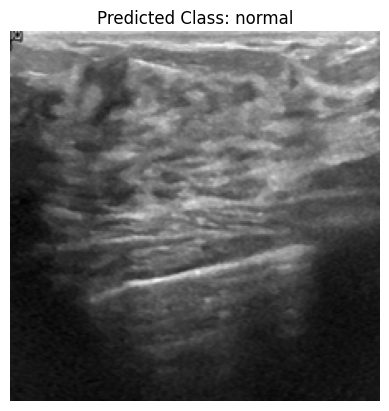

1/1 [==============================] - 0s 29ms/step


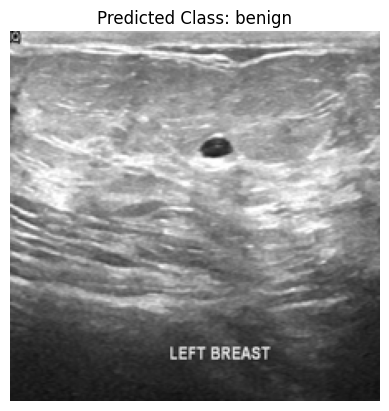

1/1 [==============================] - 0s 29ms/step


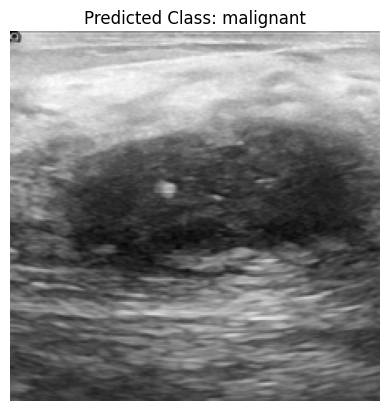

'if predicted_class is not None:\n    print(f"Predicted Class: {predicted_class}")\n    plt.imshow(image)\n    plt.axis(\'off\')\n    plt.show()\nelse:\n    print("No images in the dataset.")\n'

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('final_model.h5')  # Replace 'my_model.h5' with your model's path

# Define class labels
class_labels = ['benign', 'malignant', 'normal']

def classify_image(dataset1):

    num_images = len(dataset1)
    predicted_class_label = None

    # Loop through each image in the dataset
    for index in range(num_images):

        input_image = np.expand_dims(dataset1[index], axis=0)

        prediction = model.predict(input_image)

        predicted_class_index = np.argmax(prediction)

        predicted_class_label = class_labels[predicted_class_index]

        plt.imshow(input_image.squeeze())
        plt.title(f"Predicted Class: {predicted_class_label}")
        plt.axis('off')
        plt.show()

    # Return the predicted class label and image if there are images in the dataset
    if predicted_class_label is not None:
        return predicted_class_label, input_image.squeeze()
    else:
        return None, None

# Example usage
classify_image(dataset1)